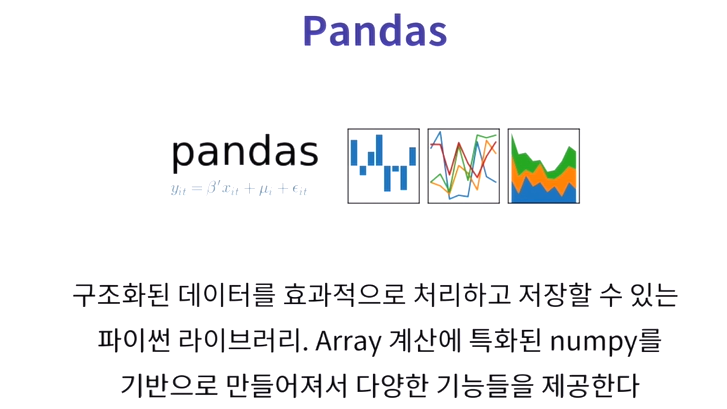

시리즈란 특수한 딕셔너리라 생각하면 된다

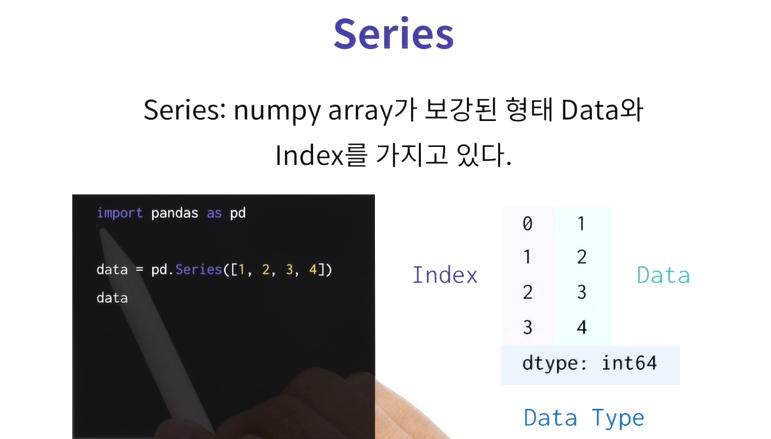

In [1]:
# 라이브러리 불러오기

import pandas as pd

In [2]:
data = pd.Series([1, 2, 3, 4])
data

0    1
1    2
2    3
3    4
dtype: int64

In [3]:
data = pd.Series([1, 2, 3, 4], index=['a','b','c','d'])
data

a    1
b    2
c    3
d    4
dtype: int64

In [7]:
data['b']

2

시리즈는 딕셔너리로 만들 수 있다.

In [9]:
population_dict = {'korea':5180,
                  'japan':12718,
                  'china':141500,
                  'usa':32676}
population = pd.Series(population_dict)
population

korea      5180
japan     12718
china    141500
usa       32676
dtype: int64

In [11]:
population.values # numpy의 array의 형태로 출력됨.

array([  5180,  12718, 141500,  32676], dtype=int64)

Series 데이터
Series 데이터란 Numpy array가 보강된 형태로, Data와 index를 가지고 있는 데이터 형식입니다.

주어진 예시는 Series 데이터를 만드는 방법입니다.

이번 실습에서는 딕셔너리를 이용해서 인덱스와 값을 지정하여 Series 데이터를 직접 만들어봅시다.

딕셔너리의 값은 다음과 같습니다.

korea : 5180
japan : 12718
china : 141500
usa : 32676

In [13]:
population_dict = {'korea':5180,
                  'japan':12718,
                  'china':141500,
                  'usa':32676}
country = pd.Series(population_dict)
country

korea      5180
japan     12718
china    141500
usa       32676
dtype: int64

# DataFrame

여러개의 시리즈가 모여서 행과 열을 이룬 데이터

In [15]:
gdp_dict = {
    'korea':169320000,
    'japan':516700000,
    'china':149250000,
    'usa':2041280000
}
gdp = pd.Series(gdp_dict)
country = pd.DataFrame({
    'population':population, 'gdp':gdp
})

In [16]:
gdp

korea     169320000
japan     516700000
china     149250000
usa      2041280000
dtype: int64

In [18]:
country

,population,gdp
korea,5180,169320000
japan,12718,516700000
china,141500,149250000
usa,32676,2041280000


In [20]:
country.index # 인덱스 확인

Index(['korea', 'japan', 'china', 'usa'], dtype='object')

In [22]:
country.columns # 컬럼값 확인

Index(['population', 'gdp'], dtype='object')

In [23]:
# 데이터타입은 오브젝트 , 파이썬 문자열 객체

In [25]:
country['gdp'] # gdp 컬럼 시리즈만 추출

korea     169320000
japan     516700000
china     149250000
usa      2041280000
Name: gdp, dtype: int64

In [26]:
type(country['gdp'])

pandas.core.series.Series

즉, 여러개의 시리즈가 모여 데이터프레임이 형성되고 그 시리즈는 넘파이가 보강된 형태이다.

# 시리즈도 numpy array처럼 연산자를 사용할 수 있다.

In [33]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, korea to usa
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   population      4 non-null      int64  
 1   gdp             4 non-null      int64  
 2   gdp per capita  4 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 288.0+ bytes


In [28]:
gdp_per_capita = country['gdp'] / country['population']
country['gdp per capita'] = gdp_per_capita

In [29]:
country

,population,gdp,gdp per capita
korea,5180,169320000,32687.258687
japan,12718,516700000,40627.457147
china,141500,149250000,1054.770318
usa,32676,2041280000,62470.314604


In [35]:
# 이렇게 만든 데이터를 저장할 수 있다.

In [36]:
# country.to_csv("./country.csv")
# country.to_excel("country.xlsx")

# country = pd.read_csv("./country.csv")
# countyy = pd,read_excel("country.xlsx")

# 인덱싱과 슬라이싱

loc : 명시적인 인덱스를 참조하는 인덱싱/슬라이싱

In [39]:
country.loc['china'] # e+05 는 10의 5승(과학적 표기법)

population        1.415000e+05
gdp               1.492500e+08
gdp per capita    1.054770e+03
Name: china, dtype: float64

In [43]:
country

,population,gdp,gdp per capita
korea,5180,169320000,32687.258687
japan,12718,516700000,40627.457147
china,141500,149250000,1054.770318
usa,32676,2041280000,62470.314604


In [48]:
country.loc['korea':'japan', :'gdp']

,population,gdp
korea,5180,169320000
japan,12718,516700000


In [49]:
# 순서 주의!

iloc: 파이썬 스타일 정수 인덱스 인덱싱/ 슬라이싱

In [52]:
country.iloc[0] # 인덱스의 순서

population        5.180000e+03
gdp               1.693200e+08
gdp per capita    3.268726e+04
Name: korea, dtype: float64

In [54]:
country.iloc[1:3, :2] # 1부터 2 인덱스, 0~1 번째 컬럼까지 출력

,population,gdp
japan,12718,516700000
china,141500,149250000


간혹 ix 사용[] 혼합사용 가능 지원 중단됨

# 데이터프레임 새 데이터 추가/수정

In [61]:
# 리스트 수정방식과 딕셔너리 추가 방법 존재

df = pd.DataFrame(columns=['이름','나이','주소'])
df.loc[0] = ['임원균', '26', '서울']     
df.loc[1] = {'이름':'철수', '나이':'25', '주소':'인천'} # 컬럼값이 키값으로 들어감

df.loc[1, '이름'] = '영희'  #  수정

In [62]:
df

,이름,나이,주소
0,임원균,26,서울
1,영희,25,인천


In [64]:
import numpy as np
df['전화번호'] = np.nan

In [65]:
df

,이름,나이,주소,전화번호
0,임원균,26,서울,NaN
1,영희,25,인천,NaN


In [66]:
df.loc[0, '전화번호'] = "01012345678"
df

,이름,나이,주소,전화번호
0,임원균,26,서울,01012345678
1,영희,25,인천,NaN


In [68]:
len(df) # 데이터의 개수 인덱스 값이라고 생각

2

컬럼 이름이 하나만 있다면 시리즈
리스트로 들어가 있다면 dataframe

In [69]:
df['이름']

0    임원균
1     영희
Name: 이름, dtype: object

In [70]:
df[['이름']]

,이름
0,임원균
1,영희


In [71]:
df[['이름','주소']]

,이름,주소
0,임원균,서울
1,영희,인천


In [72]:
df.loc[0] # 인덱스 명

이름              임원균
나이               26
주소               서울
전화번호    01012345678
Name: 0, dtype: object

In [74]:
df.iloc[0] # 인덱스 번호

이름              임원균
나이               26
주소               서울
전화번호    01012345678
Name: 0, dtype: object

In [75]:
df

,이름,나이,주소,전화번호
0,임원균,26,서울,01012345678
1,영희,25,인천,NaN


# 누락된 데이터 체크

In [80]:
df1 = df.isnull()
df1

,이름,나이,주소,전화번호
0,False,False,False,False
1,False,False,False,True


In [79]:
df.notnull()

,이름,나이,주소,전화번호
0,True,True,True,True
1,True,True,True,False


In [85]:
np.count_nonzero(df1)

1

In [92]:
df.isnull()

,이름,나이,주소,전화번호
0,False,False,False,False
1,False,False,False,True


In [93]:
np.sum(df.isnull())

이름      0
나이      0
주소      0
전화번호    1
dtype: int64

In [96]:
df.dropna() # 널값 로우 자체를 삭제

,이름,나이,주소,전화번호
0,임원균,26,서울,01012345678


In [98]:
df['전화번호'] = df['전화번호'].fillna('전화번호 없음') # 널값 채우기

In [100]:
df

,이름,나이,주소,전화번호
0,임원균,26,서울,01012345678
1,영희,25,인천,전화번호 없음


# 시리즈 연산

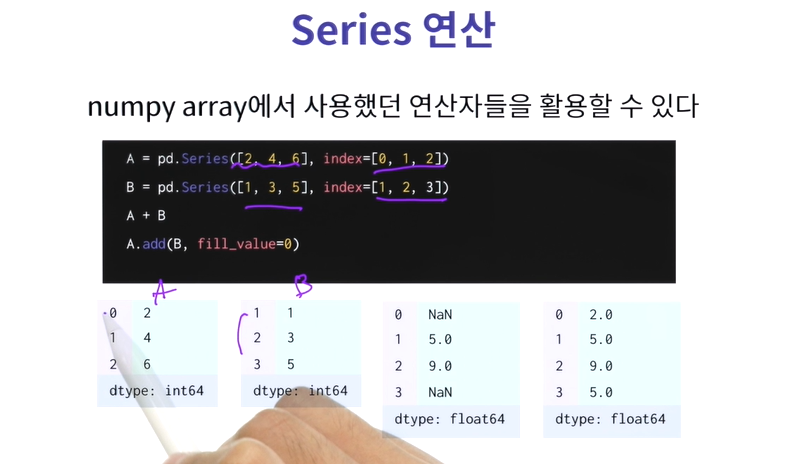

In [101]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [104]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

# DF연산

In [105]:
A = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=list("AB"))
A

,A,B
0,7,3
1,8,4


In [109]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=list("BAC"))
B

,B,A,C
0,4,9,8
1,8,7,3
2,5,5,6


In [110]:
A + B

,A,B,C
0,16.0,7.0,NaN
1,15.0,12.0,NaN
2,NaN,NaN,NaN


In [111]:
A.add(B, fill_value=0)

,A,B,C
0,16.0,7.0,8.0
1,15.0,12.0,3.0
2,5.0,5.0,6.0


# 집계함수

In [112]:
data = {
    'A': [ i+5 for i in range(3)],
    'B': [ i**2 for i in range(3)]
}
data

{'A': [5, 6, 7], 'B': [0, 1, 4]}

In [114]:
df = pd.DataFrame(data)
df

,A,B
0,5,0
1,6,1
2,7,4


In [115]:
df['A']

0    5
1    6
2    7
Name: A, dtype: int64

In [116]:
df['A'].sum()

18

In [118]:
df.sum()

A    18
B     5
dtype: int64

In [120]:
df.mean()

A    6.000000
B    1.666667
dtype: float64

In [121]:
print("A: ")
A = pd.DataFrame(np.random.randint(0, 10, (2, 2)), columns=['A', 'B'])      #칼럼이 A, B입니다.
print(A, "\n")


print("B: ")
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)), columns=['B', 'A', 'C'])     #칼럼이 B, A, C입니다.
print(B, "\n")


# 아래에 다양한 연산을 자유롭게 적용해보세요.
print(A+B)
print(A.add(B, fill_value=0))
print(A.sub(B, fill_value=0))
print(A.mul(B, fill_value=0))
print(A.div(B, fill_value=0))

A: 
   A  B
0  6  1
1  3  0 

B: 
   B  A  C
0  8  1  3
1  1  5  6
2  2  5  4 

     A    B   C
0  7.0  9.0 NaN
1  8.0  1.0 NaN
2  NaN  NaN NaN
     A    B    C
0  7.0  9.0  3.0
1  8.0  1.0  6.0
2  5.0  2.0  4.0
     A    B    C
0  5.0 -7.0 -3.0
1 -2.0 -1.0 -6.0
2 -5.0 -2.0 -4.0
      A    B    C
0   6.0  8.0  0.0
1  15.0  0.0  0.0
2   0.0  0.0  0.0
     A      B    C
0  6.0  0.125  0.0
1  0.6  0.000  0.0
2  0.0  0.000  0.0


# DF 정렬하기

In [124]:
df = pd.DataFrame({
    'col1' : [2,1,9,8,7,4],
    'col2' : ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col3' : [0, 1, 9, 4, 2, 3]
})
df

,col1,col2,col3
0,2,A,0
1,1,A,1
2,9,B,9
3,8,NaN,4
4,7,D,2
5,4,C,3


In [130]:
df.sort_values("col1") # 기본적으로 오름차순

,col1,col2,col3
1,1,A,1
0,2,A,0
5,4,C,3
4,7,D,2
3,8,NaN,4
2,9,B,9


In [132]:
df.sort_values('col1', ascending=False) # 내림차순

,col1,col2,col3
2,9,B,9
3,8,NaN,4
4,7,D,2
5,4,C,3
0,2,A,0
1,1,A,1


In [126]:
df.sort_values("col2")

,col1,col2,col3
0,2,A,0
1,1,A,1
2,9,B,9
5,4,C,3
4,7,D,2
3,8,NaN,4


In [136]:
# 두개의 값으로 정렬하기
df.sort_values(['col2', 'col1']) # col2가 우선적으로 정렬됨
# 같은 A에 대해서 col1의 오름차순이 우선시

,col1,col2,col3
1,1,A,1
0,2,A,0
2,9,B,9
5,4,C,3
4,7,D,2
3,8,NaN,4


In [137]:
import numpy as np
import pandas as pd

print("DataFrame: ")
df = pd.DataFrame({
    'col1' : [2, 1, 9, 8, 7, 4],
    'col2' : ['A', 'A', 'B', np.nan, 'D', 'C'],
    'col3': [0, 1, 9, 4, 2, 3],
})
print(df, "\n")


# 정렬 코드 입력해보기    
# Q1. col1을 기준으로 오름차순으로 정렬하기.
print(df.sort_values('col1'))


# Q2. col2를 기준으로 내림차순으로 정렬하기.
print(df.sort_values('col2', ascending=False))


# Q3. col2를 기준으로 오름차순으로, col1를 기준으로 내림차순으로 정렬하기.
print(df.sort_values(['col2', 'col1'], ascending=[True,False]))



DataFrame: 
   col1 col2  col3
0     2    A     0
1     1    A     1
2     9    B     9
3     8  NaN     4
4     7    D     2
5     4    C     3 

   col1 col2  col3
1     1    A     1
0     2    A     0
5     4    C     3
4     7    D     2
3     8  NaN     4
2     9    B     9
   col1 col2  col3
4     7    D     2
5     4    C     3
2     9    B     9
0     2    A     0
1     1    A     1
3     8  NaN     4
   col1 col2  col3
0     2    A     0
1     1    A     1
2     9    B     9
5     4    C     3
4     7    D     2
3     8  NaN     4
